In [1]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


(600, 2)

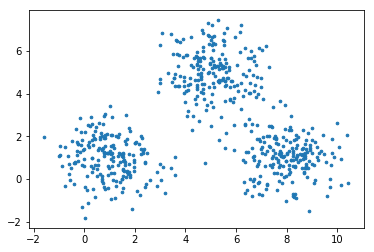

In [38]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)
data.shape

(array([[ 0.52563939,  3.92363818],
        [ 7.54516676,  5.80257541],
        [-0.49683285,  3.7037743 ]]),
 array([3.03756484, 2.1276935 ]),
 array([4.67400682, 2.34287378]))

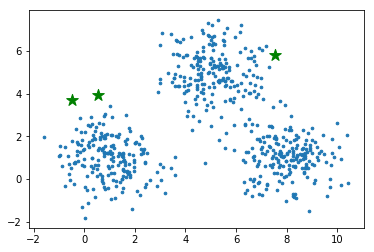

In [44]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
centers,std,mean

In [57]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))


error = np.linalg.norm(centers_new - centers_old)
# print(k)
# print(distances)
# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    print("err",error)
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    print("distances",distances)
    clusters = np.argmin(distances, axis = 1)
    print("clusters",clusters)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
# centers_new

err 10.965192344973053
distances [[3.13188558 8.08202374 3.29220116]
 [2.82507671 7.67015067 3.10631131]
 [1.2928022  8.27461977 0.91830239]
 ...
 [7.80739106 4.74924737 8.69726158]
 [6.31284985 3.69846326 7.25483585]
 [8.02059082 6.58800036 8.75604766]]
clusters [0 0 2 0 2 0 0 0 2 2 0 0 2 0 0 2 2 2 0 2 0 0 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0
 2 2 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 0 2 0 2 0 0 2 0 0 2 0 0 2 0 2 2
 2 0 2 2 0 2 0 0 2 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2
 2 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 0 2 0 2 0
 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 2 0 0 0 2 2 0 2 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 

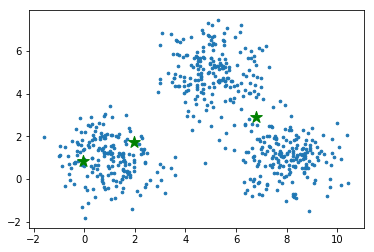

In [170]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)


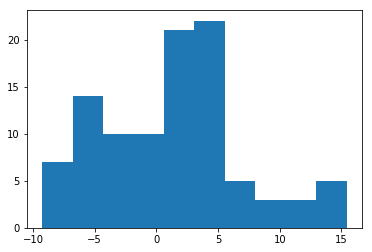

array([ 0., -1., -1.,  0., -1., -1., -0.,  0.,  1., -0., -2.,  0., -0.,
        1., -0., -1., -2.,  1., -0.,  2.,  1., -1.,  1., -1., -1., -2.,
       -1.,  0.,  0.,  1.,  1., -1., -2., -0., -1., -0., -0.,  0., -1.,
       -0., -0., -1., -1.,  1., -0., -1., -1.,  1.,  1.,  2.,  2., -0.,
        0., -0.,  0., -1.,  0.,  0., -1., -1., -0.,  1., -0.,  1., -2.,
        0.,  1.,  0.,  1., -1.,  2.,  0.,  0.,  1.,  0., -2., -0.,  1.,
        0., -0.,  0., -1., -0.,  1., -3.,  1.,  2., -0., -0., -1.,  1.,
       -2.,  1.,  1., -0.,  0., -1.,  2., -1.,  2.,  2.,  1., -2., -0.,
        0.,  1., -1., -0., -1., -2., -1.,  0., -2., -1.,  1.,  0.,  2.,
       -0.,  2.,  0., -1.,  0.,  0.,  0.,  0., -2., -2., -2.,  1.,  2.,
        0., -0., -0.,  1., -1.,  1.,  1., -2.,  1.,  0., -0., -0., -1.,
        0.,  1., -1.,  0.,  0.,  0., -1., -0., -1., -1., -0., -1., -1.,
        0., -1.,  0., -1., -1., -0.,  1.,  2., -1., -1.,  1., -1.,  0.,
       -1., -0., -2., -1.,  1., -1.,  1., -0.,  1., -1.,  0.,  2

In [220]:
data = 5 * np.random.randn(100) + 1
# add extreme values
# data = np.append(data, np.zeros(10))
plt.hist(data)
plt.show()
a

In [221]:
np.linalg.norm?